# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

C:\Users\Legion\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Importing and cleaning of the dataset.

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1


In [3]:
df.shape

(1000, 14)

In [4]:
#lets first check for any null values
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

### It's a good news that the dataset doesn't have any null values

In [5]:
#lets check if the data type is correct for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


<hr>

Data values of column Salary Estimate are not correct/clean  <br>
We need to clean this column and change its create new columns like Min Salary and Max Salary

In [6]:
df['Salary Estimate']
# looks like the pattern is same accross the data values : $numK - $numK (Glassdoor Est.)
# we need to remove the extra characters and just keep the numerical values

0        $77K-$92K (Glassdoor Est.)
1        $77K-$92K (Glassdoor Est.)
2        $77K-$92K (Glassdoor Est.)
3        $77K-$92K (Glassdoor Est.)
4        $77K-$92K (Glassdoor Est.)
                   ...             
995    $105K-$138K (Glassdoor Est.)
996    $105K-$138K (Glassdoor Est.)
997    $105K-$138K (Glassdoor Est.)
998    $105K-$138K (Glassdoor Est.)
999    $105K-$138K (Glassdoor Est.)
Name: Salary Estimate, Length: 1000, dtype: object

before we mess it up, lets copy the data into another variable so operations do not affect the 
original data and we will always have an option to roll back to the original data


In [7]:
copy_df = df.copy()
copy_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1


In [8]:
copy_df['Salary Estimate'].value_counts(dropna=False)
#this confirms what we need to remove from the values

$105K-$138K (Glassdoor Est.)          130
$108K-$140K (Glassdoor Est.)           30
$59K-$101K (Glassdoor Est.)            30
$81K-$137K (Glassdoor Est.)            30
$81K-$102K (Glassdoor Est.)            30
$60K-$124K (Glassdoor Est.)            30
$71K-$108K (Glassdoor Est.)            30
$112K-$149K (Glassdoor Est.)           30
$88K-$133K (Glassdoor Est.)            30
$83K-$99K (Glassdoor Est.)             30
$92K-$146K (Glassdoor Est.)            30
$86K-$108K (Glassdoor Est.)            30
$73K-$128K (Glassdoor Est.)            30
$68K-$119K (Glassdoor Est.)            30
$125K-$156K (Glassdoor Est.)           30
$77K-$92K (Glassdoor Est.)             30
$72K-$121K (Glassdoor Est.)            30
$70K-$119K (Glassdoor Est.)            30
$110K-$145K (Glassdoor Est.)           30
$48K-$91K (Glassdoor Est.)             30
$50K-$63K (Glassdoor Est.)             30
$95K-$165K (Glassdoor Est.)            30
$57K-$94K (Glassdoor Est.)             30
$105K-$117K (Glassdoor Est.)      

In [9]:
#lets first get rid of that "(Glassdoor Est.)" text
#here we are using regular expression to split the text by either '(' or 'P'
#it will return a list after spliting, then we will keep the 0th element from the list
import re
def split_string(string):
    split_result = re.split(r'\(|P', string)
    return split_result[0] if split_result else ""

copy_df['Salary_Estimate'] = copy_df['Salary Estimate'].apply(lambda x: split_string(x))

In [10]:
copy_df['Salary_Estimate']

0        $77K-$92K 
1        $77K-$92K 
2        $77K-$92K 
3        $77K-$92K 
4        $77K-$92K 
           ...     
995    $105K-$138K 
996    $105K-$138K 
997    $105K-$138K 
998    $105K-$138K 
999    $105K-$138K 
Name: Salary_Estimate, Length: 1000, dtype: object

In [11]:
# lets remove the $ and k signs now
copy_df['Salary_Estimate'] = copy_df['Salary_Estimate'].apply(lambda x: x.replace("$", "").replace("K", ""))


In [12]:
copy_df['Salary_Estimate'][0]

'77-92 '

In [13]:
#now that we have only numbers from the text, we can create new columns like Min, Max Salary, and Average Salary
copy_df['Min Salary'] = copy_df['Salary_Estimate'].apply(lambda x: int(x.split('-')[0]))
copy_df['Max Salary'] = copy_df['Salary_Estimate'].apply(lambda x: int(x.split('-')[1]))
copy_df['Avg Salary'] = (copy_df['Min Salary']+copy_df['Max Salary'])/2

In [14]:
copy_df['Min Salary']

0       77
1       77
2       77
3       77
4       77
      ... 
995    105
996    105
997    105
998    105
999    105
Name: Min Salary, Length: 1000, dtype: int64

In [15]:
copy_df['Max Salary']

0       92
1       92
2       92
3       92
4       92
      ... 
995    138
996    138
997    138
998    138
999    138
Name: Max Salary, Length: 1000, dtype: int64

In [16]:
copy_df['Avg Salary']

0       84.5
1       84.5
2       84.5
3       84.5
4       84.5
       ...  
995    121.5
996    121.5
997    121.5
998    121.5
999    121.5
Name: Avg Salary, Length: 1000, dtype: float64

In [17]:
#lets clean the Size column so that we can create new columns for computation
copy_df['Size'] = copy_df['Size'].apply(lambda x :  x.replace('to','').replace('employees',''))

In [18]:
copy_df['Size'].value_counts()

51  200         200
1001  5000      162
10000+          151
1  50           130
201  500        124
501  1000       121
5001  10000      55
Unknown          30
-1               27
Name: Size, dtype: int64

In [19]:
#
copy_df = copy_df[copy_df['Size'] != 'Unknown']
copy_df = copy_df[copy_df['Size'] != '-1']


In [20]:
copy_df['Size'].value_counts()

51  200         200
1001  5000      162
10000+          151
1  50           130
201  500        124
501  1000       121
5001  10000      55
Name: Size, dtype: int64

In [21]:
#company name has rating and \n attached to it at the end. We need to fix this by removing it.
copy_df['Company_Text'] = copy_df.apply(lambda x : x['Company Name'] if x['Rating']<0 else x['Company Name'][:-4],axis =1)

In [22]:
copy_df = copy_df[copy_df['Location'].str.contains(',')]

In [23]:
#lets create a new column for state, which stores State of that company 
copy_df['State'] = copy_df['Location'].apply(lambda x : x.split(',')[-1])

In [24]:
# we can also create a column which tells us if the company location is the
#headquarters for the corresponding company or not
copy_df['Same State'] = copy_df.apply(lambda x : 1 if x.Location == x.Headquarters else  0 ,axis = 1)

In [25]:
# we can also find out the age of the company using FOUNDED column
# but this column contain irregular values like -1, since the founded year cannot be negative
# we will fill it with median that is 1995
copy_df['Founded'] = copy_df['Founded'].replace(-1,1995)

In [26]:
# here we are calculating the age of the company
copy_df['Company Age'] = copy_df['Founded'].apply(lambda x: x if x <1  else 2023 -x)

In [27]:
# we can use JOB DESCRIPTION column to find out which technologies company ask for a candidate must have experience in
# Python

copy_df['Python_req'] = copy_df['Job Description'].apply(
    lambda x: 1 if 'python' in x.lower() or 'Python' in x.lower() else 0)
copy_df['Python_req'].value_counts()

1    604
0    318
Name: Python_req, dtype: int64

In [28]:
# R Studio

copy_df['R_Studio_req'] = copy_df['Job Description'].apply(
    lambda x: 1 if 'r studio' in x.lower() or 'R studio' in x.lower() or 'R Studio' in x.lower() else 0)
copy_df['R_Studio_req'].value_counts()

0    919
1      3
Name: R_Studio_req, dtype: int64

In [29]:
#spark
copy_df['Spark_req'] = copy_df['Job Description'].apply(
    lambda x: 1 if 'Spark' in x.lower() or 'spark' in x.lower() else 0)
copy_df['Spark_req'].value_counts()

0    707
1    215
Name: Spark_req, dtype: int64

In [30]:
#Excel
copy_df['Excel_req'] = copy_df['Job Description'].apply(
    lambda x: 1 if 'Excel' in x.lower() or 'excel' in x.lower() else 0)
copy_df['Excel_req'].value_counts()

0    533
1    389
Name: Excel_req, dtype: int64

In [31]:
#Aws
copy_df['AWS_req'] = copy_df['Job Description'].apply(
    lambda x: 1 if 'AWS' in x.lower() or 'aws' in x.lower() else 0)
copy_df['AWS_req'].value_counts()

0    696
1    226
Name: AWS_req, dtype: int64

In [32]:
copy_df.to_csv('CleanedGlassdoorDataScienceJobs.csv',index = False)

In [33]:
# we need to amalgamate all the Job titles, just to identify job titles quickly
# bcoz lot of job titles are included when we talk about data science or data scientist role
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [34]:
copy_df['job_simplified'] = copy_df['Job Title'].apply(title_simplifier)
copy_df['seniority'] = copy_df['Job Title'].apply(seniority)

In [35]:
# in the state column or location column, we have Los Angeles as state which is incorrect. we need to fix this
copy_df['State'] = copy_df['State'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')
copy_df.loc[copy_df["State"] == "Raleigh", "State"] = "NC"

In [36]:
# lets count the joob description length into a new column
copy_df['desc length'] = copy_df['Job Description'].apply(lambda x : len(x))

In [37]:
copy_df['hourly'] = copy_df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

In [38]:
copy_df['employer_provided'] = copy_df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [39]:
# competitor count 
copy_df['Competitor_count'] = copy_df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)

In [40]:
copy_df['Min Salary'] = copy_df.apply(lambda x : x['Min Salary']*2 if x.hourly == 1 else x['Min Salary'],axis=1) 
copy_df['Max Salary'] = copy_df.apply(lambda x : x['Max Salary']*2 if x.hourly == 1 else x['Max Salary'],axis=1) 

In [41]:
copy_df[copy_df.hourly == 1][['hourly','Min Salary','Max Salary']]

,hourly,Min Salary,Max Salary
60,1,34,46
61,1,34,46
62,1,34,46
63,1,34,46
64,1,34,46
65,1,34,46
66,1,34,46
67,1,34,46
68,1,34,46
69,1,34,46


In [42]:
copy_df.to_csv('FullyCleanedGlassdoorData.csv')

# NOW THAT OUR CLEANING IS FINISHED, WE CAN MOVE ON TO THE EDA PROCESS

In [43]:
copy_df.describe()

,Rating,Founded,Min Salary,Max Salary,Avg Salary,Same State,Company Age,Python_req,R_Studio_req,Spark_req,Excel_req,AWS_req,desc length,hourly,employer_provided,Competitor_count
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.0,922.000000
mean,3.762039,1983.215835,83.363341,121.000000,101.552603,0.454447,39.784165,0.655098,0.003254,0.233189,0.421909,0.245119,3666.792842,0.031453,0.0,0.866594
std,0.946260,43.788457,25.013336,33.150628,29.620275,0.498191,43.788457,0.475594,0.056980,0.423091,0.494132,0.430391,1800.458351,0.174634,0.0,1.295021
min,-1.000000,1690.000000,34.000000,46.000000,20.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,259.000000,0.000000,0.0,0.000000
25%,3.400000,1982.000000,68.000000,101.000000,89.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2521.000000,0.000000,0.0,0.000000
50%,3.800000,1996.000000,83.000000,121.000000,99.500000,0.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3490.000000,0.000000,0.0,0.000000
75%,4.300000,2008.000000,105.000000,138.000000,121.500000,1.000000,41.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4583.750000,0.000000,0.0,2.000000
max,5.000000,2019.000000,139.000000,229.000000,184.000000,1.000000,333.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18555.000000,1.000000,0.0,3.000000


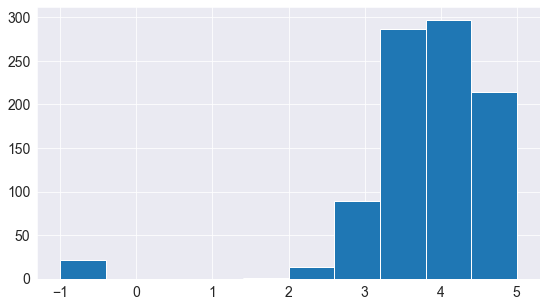

In [44]:
#lets take a look at Ratings 
copy_df['Rating'].hist()

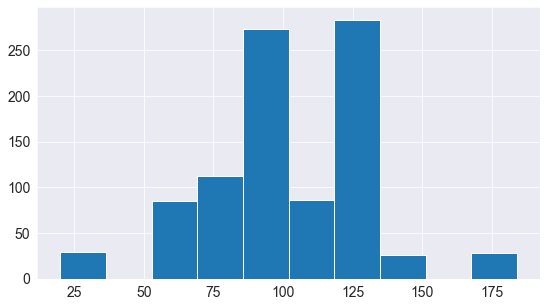

In [45]:
#AVG SALARY
copy_df['Avg Salary'].hist()

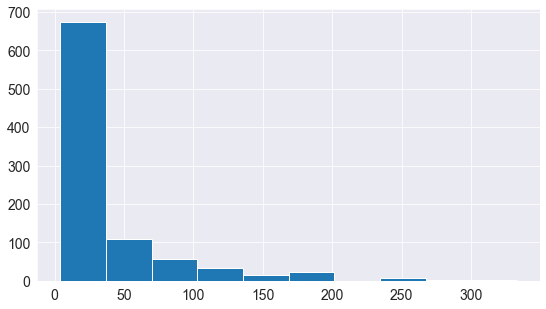

In [46]:
#AGE
copy_df['Company Age'].hist()

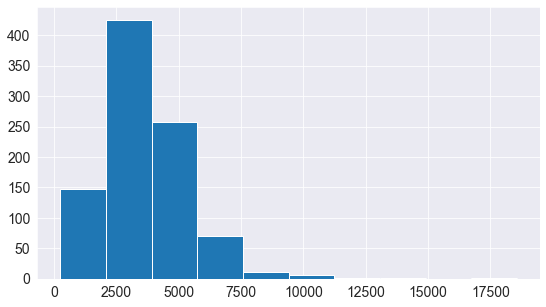

In [47]:
#job description length
copy_df['desc length'].hist()

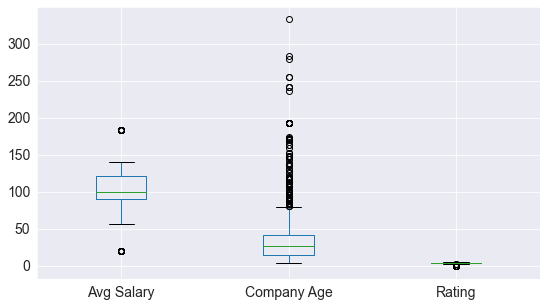

In [48]:
# box plot for average salary
copy_df.boxplot(column=['Avg Salary','Company Age','Rating'])

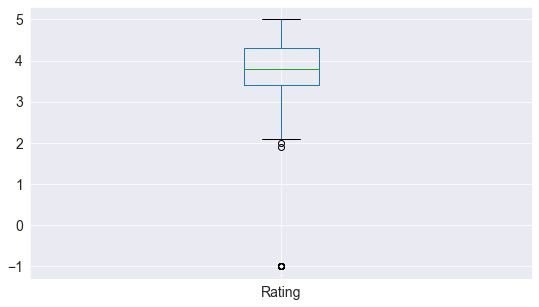

In [49]:
copy_df.boxplot(column=['Rating'])

In [50]:
copy_df[['Avg Salary','Company Age','Rating','desc length','Competitor_count']].corr()

,Avg Salary,Company Age,Rating,desc length,Competitor_count
Avg Salary,1.000000,0.058442,0.004090,0.003104,0.038099
Company Age,0.058442,1.000000,-0.054105,0.281290,0.214457
Rating,0.004090,-0.054105,1.000000,-0.017806,0.035735
desc length,0.003104,0.281290,-0.017806,1.000000,0.199452
Competitor_count,0.038099,0.214457,0.035735,0.199452,1.000000


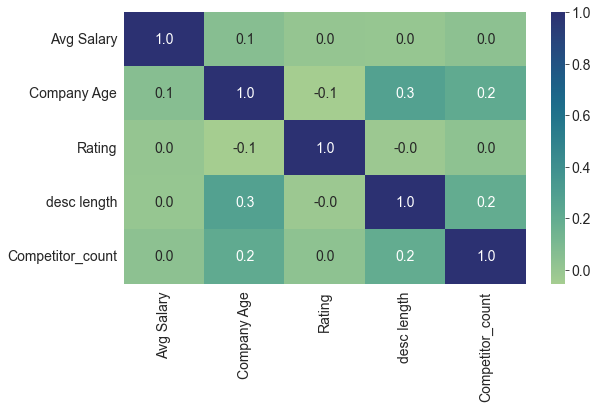

In [51]:
sns.heatmap(copy_df[['Avg Salary','Company Age','Rating','desc length','Competitor_count']].corr(), annot=True, fmt=".1f",cmap='crest')

In [52]:
copy_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Estimate', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company_Text', 'State', 'Same State', 'Company Age', 'Python_req',
       'R_Studio_req', 'Spark_req', 'Excel_req', 'AWS_req', 'job_simplified',
       'seniority', 'desc length', 'hourly', 'employer_provided',
       'Competitor_count'],
      dtype='object')

In [53]:
# making a categorical data
df_cat = copy_df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_Text', 'State',
                  'Python_req',
                  'R_Studio_req', 'Spark_req', 'Excel_req', 'AWS_req', 'job_simplified',
                  'seniority' ]]

Graph for Location : Total Count = 282


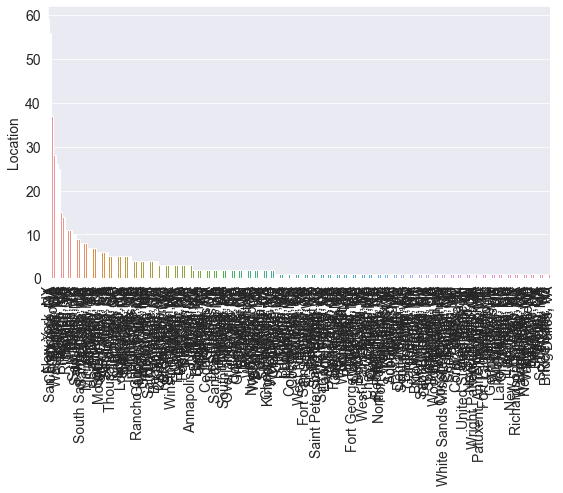

Graph for Headquarters : Total Count = 300


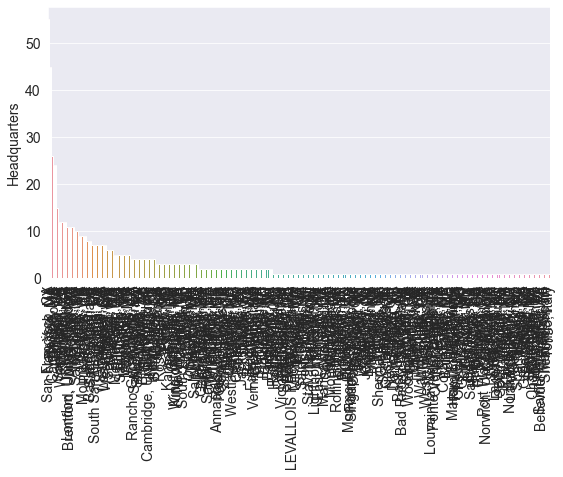

Graph for Size : Total Count = 7


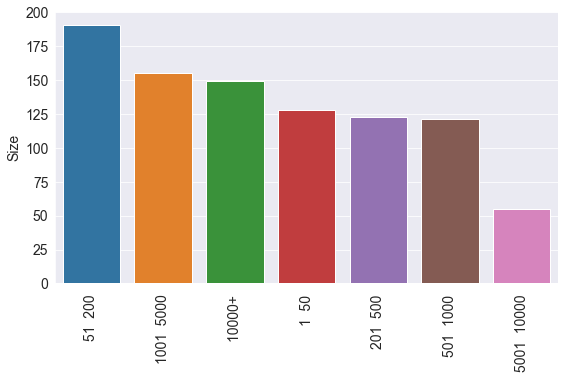

Graph for Type of ownership : Total Count = 11


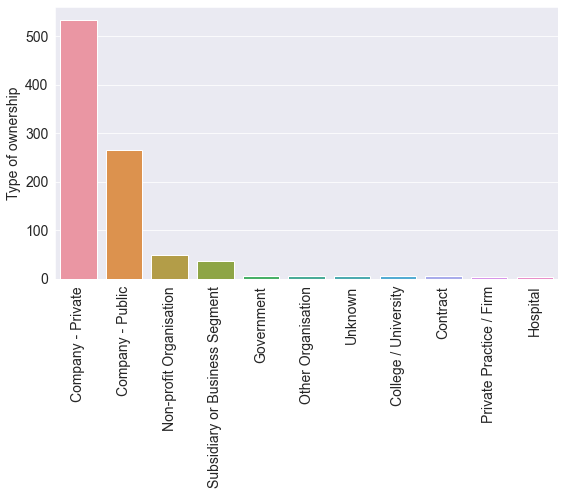

Graph for Industry : Total Count = 71


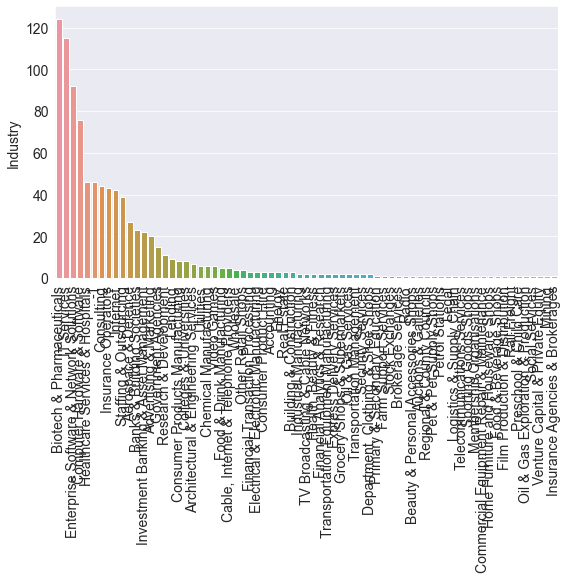

Graph for Sector : Total Count = 23


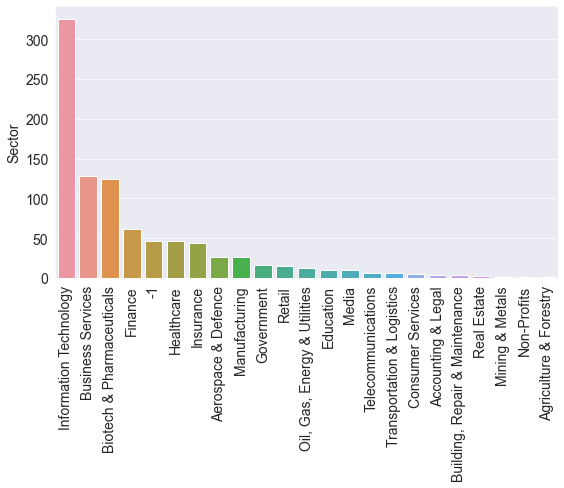

Graph for Revenue : Total Count = 12


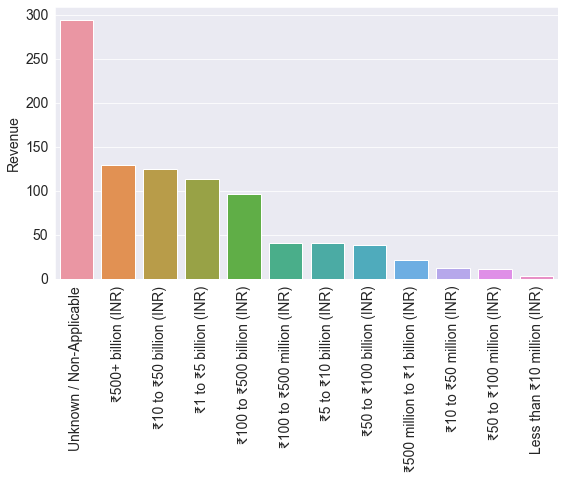

Graph for Company_Text : Total Count = 667


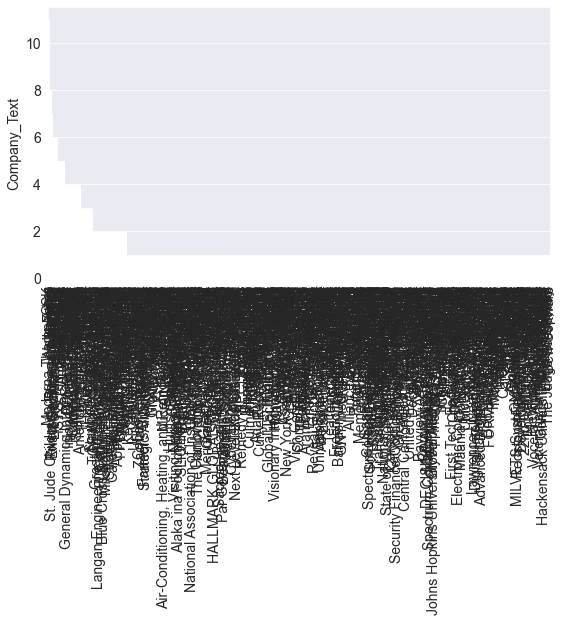

Graph for State : Total Count = 45


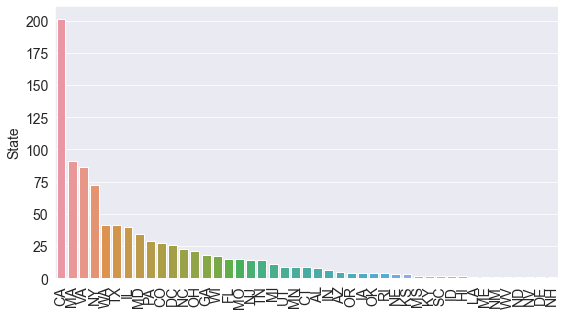

Graph for Python_req : Total Count = 2


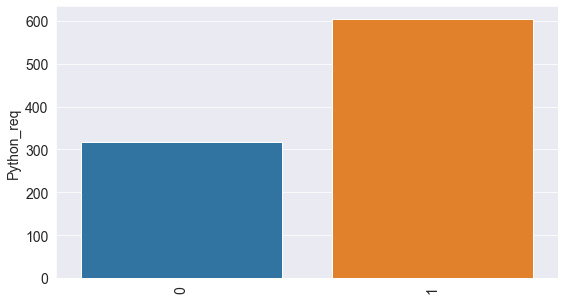

Graph for R_Studio_req : Total Count = 2


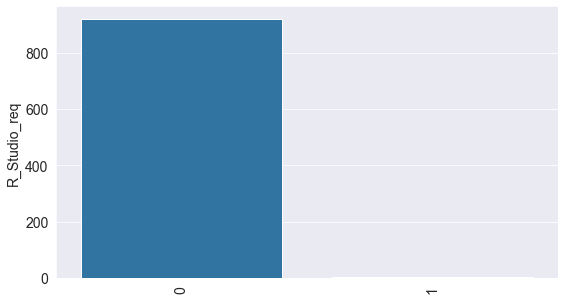

Graph for Spark_req : Total Count = 2


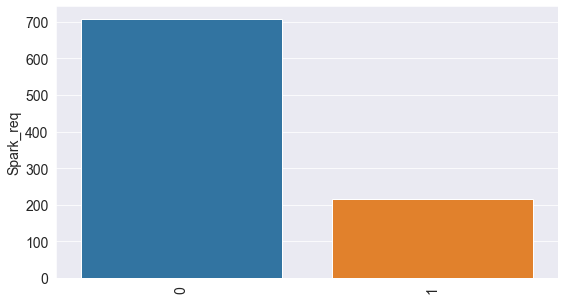

Graph for Excel_req : Total Count = 2


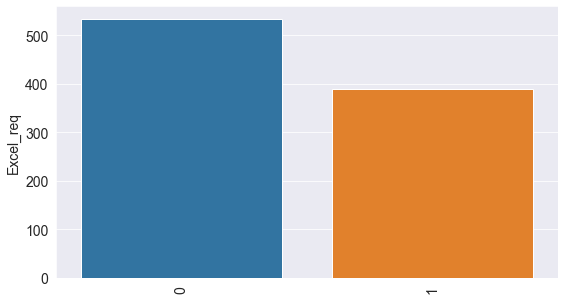

Graph for AWS_req : Total Count = 2


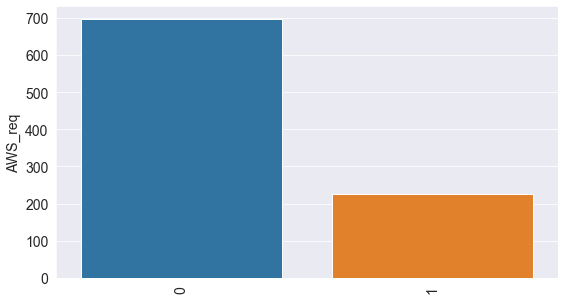

Graph for job_simplified : Total Count = 7


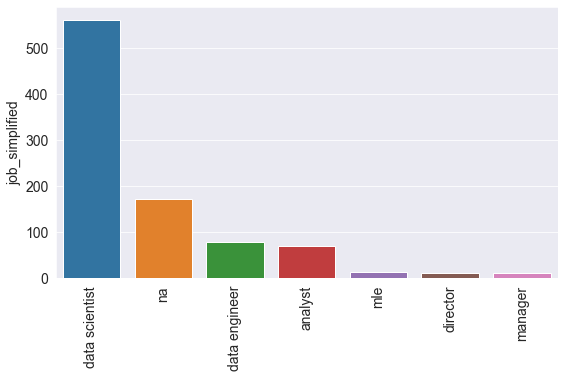

Graph for seniority : Total Count = 3


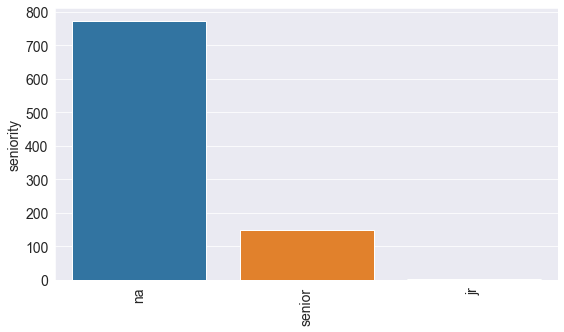

In [54]:
# lets visualize columns from this data and interpret the plot
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s : Total Count = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index,y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

Graph for Location : Total Count = 20


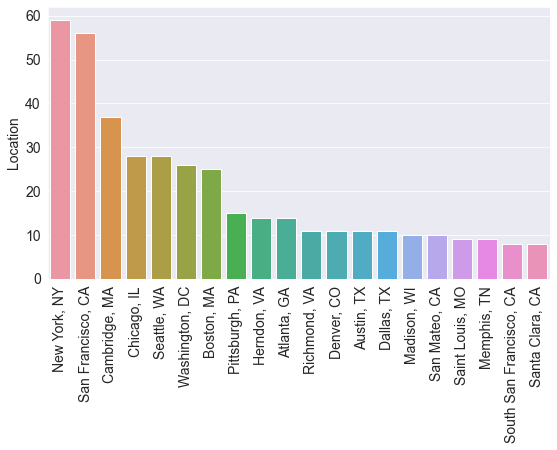

Graph for Headquarters : Total Count = 20


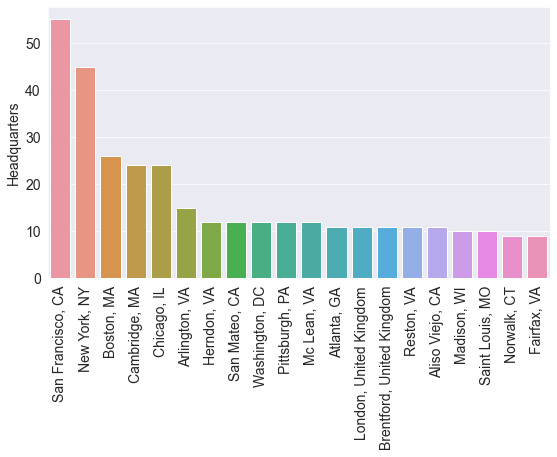

Graph for Company_Text : Total Count = 20


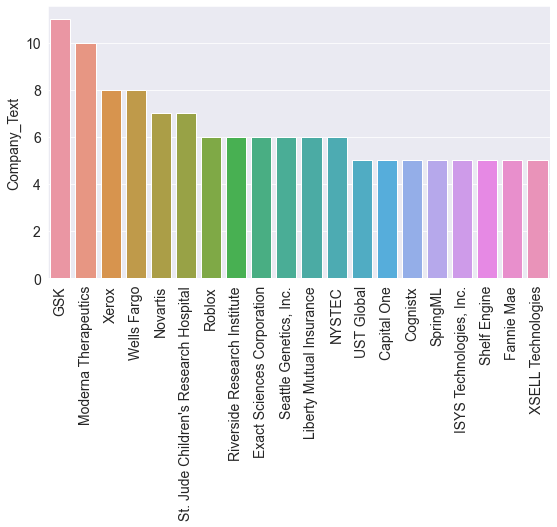

In [55]:
 # lets seperate the columns with too much of data and break it to top 20 for better understanding
for i in df_cat[['Location','Headquarters','Company_Text']]:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s : Total Count = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index,y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()    

In [56]:
#salary by different columns

pd.pivot_table(copy_df,index='job_simplified',values = "Avg Salary")

,Avg Salary
job_simplified,
analyst,97.857143
data engineer,100.050000
data scientist,103.244662
director,97.083333
manager,99.375000
mle,113.250000
na,97.738372


In [57]:
#lets see how are these roles getting paid by seniority
pd.pivot_table(copy_df,index=['job_simplified','seniority'],values = "Avg Salary")

Avg Salary
job_simplified seniority            
analyst        jr         109.000000
               na          96.935185
               senior     100.433333
data engineer  na         102.258929
               senior      94.895833
data scientist na         103.422701
               senior     101.460784
director       na         102.100000
               senior      72.000000
manager        na          96.888889
               senior     106.833333
mle            na         106.277778
               senior     125.800000
na             na         100.338710
               senior      91.020833

In [58]:
# lets see average salary by location(statewise)
pd.pivot_table(copy_df,index=['State','job_simplified'],values='Avg Salary').sort_values('State',ascending=False)

Avg Salary
State job_simplified            
WV    data scientist  124.000000
WI    na               94.611111
      data scientist  109.750000
      data engineer    99.500000
      analyst         124.500000
WA    na               97.954545
      manager          56.500000
      data scientist  111.812500
      data engineer   105.000000
      analyst          63.000000
VA    data scientist  105.536364
      data engineer   100.850000
      analyst          81.142857
      mle              75.500000
      na               85.583333
UT    na               68.500000
      data scientist   93.333333
      data engineer    92.000000
TX    data scientist  107.782609
      data engineer   107.454545
      analyst          20.000000
      na              121.500000
TN    na              102.333333
      data scientist   94.562500
SC    data scientist   68.500000
      analyst          84.500000
RI    director        124.000000
      data scientist   80.000000
      analyst          93.250000
PA    data scientist  106.305556
      analyst         106.833333
      data engineer   124.000000
      mle             184.000000
      na              111.500000
OR    data scientist   91.625000
OK    na               83.750000
      data scientist   94.500000
      analyst          75.500000
OH    na              112.375000
      mle              20.000000
      data scientist   96.250000
      analyst         124.500000
NY    director        124.000000
      data engineer    87.666667
      data scientist  102.925532
      analyst         126.700000
      manager          74.500000
      mle              80.000000
      na              115.642857
NV    analyst         124.000000
NM    data scientist  124.000000
NJ    na              106.700000
      data scientist   94.785714
      analyst         112.500000
NH    data scientist   68.500000
NE    analyst         111.000000
      data scientist  105.500000
ND    na              111.000000
NC    na               57.000000
      mle              20.000000
      manager         130.000000
      director         72.250000
      data scientist  112.000000
      data engineer   100.875000
MS    na               90.750000
MO    na               72.500000
      data scientist  103.000000
      data engineer   184.000000
      analyst          89.750000
MN    na              111.000000
      data scientist  124.416667
      data engineer   104.250000
MI    na               68.500000
      manager          99.500000
      data scientist  101.833333
      data engineer   108.000000
ME    analyst          20.000000
MD    na               83.937500
      data scientist  102.846154
MA    director        102.500000
      analyst          93.250000
      data scientist  111.333333
      data engineer    91.050000
      manager          93.500000
      na               87.578125
LA    analyst          57.000000
KY    data scientist   96.750000
KS    manager         140.500000
      data scientist   84.500000
      analyst         140.500000
IN    data engineer    68.500000
      data scientist  100.333333
      na              120.500000
IL    na               91.500000
      data scientist   97.625000
      data engineer   104.916667
ID    na              130.500000
      data scientist  100.500000
IA    data engineer   111.000000
      analyst          89.500000
      director         89.500000
      na               96.500000
HI    data scientist  100.000000
GA    na              184.000000
      data scientist  112.633333
      data engineer    89.500000
FL    na               96.166667
      data scientist  102.954545
      data engineer    99.500000
DE    data scientist   68.500000
DC    data scientist  109.380952
      data engineer    80.000000
      analyst          75.500000
CT    analyst          20.000000
      data scientist   83.250000
      na              111.000000
CO    na              127.125000
      director         96.500000
      data scientist  101.281250
      data engineer    93.250

In [59]:
# we want to see how many roles are being offered at each state for each role
pd.pivot_table(copy_df, index=['State', 'job_simplified'], values='Avg Salary',
               aggfunc='count').sort_values('State', ascending=False)

Avg Salary
State job_simplified            
WV    data scientist           1
WI    na                       9
      data scientist           6
      data engineer            1
      analyst                  1
WA    na                      11
      manager                  1
      data scientist          24
      data engineer            3
      analyst                  2
VA    data scientist          55
      data engineer           10
      analyst                  7
      mle                      2
      na                      12
UT    na                       1
      data scientist           6
      data engineer            2
TX    data scientist          23
      data engineer           11
      analyst                  2
      na                       5
TN    na                       6
      data scientist           8
SC    data scientist           1
      analyst                  1
RI    director                 1
      data scientist           1
      analyst                  2
PA    data scientist          18
      analyst                  6
      data engineer            1
      mle                      1
      na                       3
OR    data scientist           4
OK    na                       2
      data scientist           1
      analyst                  1
OH    na                       8
      mle                      1
      data scientist          10
      analyst                  2
NY    director                 1
      data engineer            3
      data scientist          47
      analyst                 10
      manager                  3
      mle                      1
      na                       7
NV    analyst                  1
NM    data scientist           1
NJ    na                       5
      data scientist           7
      analyst                  2
NH    data scientist           1
NE    analyst                  1
      data scientist           2
ND    na                       1
NC    na                       2
      mle                      1
      manager                  1
      director                 2
      data scientist          13
      data engineer            4
MS    na                       2
MO    na                       2
      data scientist           8
      data engineer            1
      analyst                  4
MN    na                       1
      data scientist           6
      data engineer            2
MI    na                       1
      manager                  2
      data scientist           6
      data engineer            2
ME    analyst                  1
MD    na                       8
      data scientist          26
MA    director                 4
      analyst                  2
      data scientist          42
      data engineer           10
      manager                  1
      na                      32
LA    analyst                  1
KY    data scientist           2
KS    manager                  1
      data scientist           1
      analyst                  1
IN    data engineer            1
      data scientist           3
      na                       2
IL    na                       6
      data scientist          28
      data engineer            6
ID    na                       1
      data scientist           1
IA    data engineer            1
      analyst                  1
      director                 1
      na                       1
HI    data scientist           2
GA    na                       1
      data scientist          15
      data engineer            2
FL    na                       3
      data scientist          11
      data engineer            1
DE    data scientist           1
DC    data scientist          21
      data engineer            2
      analyst                  3
CT    analyst                  1
      data scientist           6
      na                       2
CO    na                       4
      director                 1
      data scientist          16
      data engineer          

In [60]:
# lets see avg salary state wise for data scientist role
pd.pivot_table(copy_df[copy_df['job_simplified'] == 'data scientist'], index=[
               'State'], values='Avg Salary').sort_values('State', ascending=False)
# west virginia leading the chart

,Avg Salary
State,
WV,124.000000
WI,109.750000
WA,111.812500
VA,105.536364
UT,93.333333
TX,107.782609
TN,94.562500
SC,68.500000
RI,80.000000


In [61]:
# we can get avg salary for some columns
df_pivot = copy_df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitor_count', 'hourly',
                    'employer_provided', 'Python_req', 'R_Studio_req', 'Spark_req', 'AWS_req', 'Excel_req',
                    'Type of ownership', 'Avg Salary']]

In [62]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index = i,values = 'Avg Salary').sort_values('Avg Salary',ascending=False))

Rating
        Avg Salary
Rating            
 2.6    114.666667
 3.0    110.047619
 4.3    108.919355
 3.8    107.967742
 4.7    107.640000
 3.3    107.388889
 3.4    107.009615
 4.9    106.815789
 4.4    104.382353
 2.9    103.547619
 2.3    103.333333
 3.9    102.685484
 3.6    102.600000
 5.0    102.134615
-1.0    101.976190
 4.0    101.175439
 3.5    100.565217
 2.1    100.500000
 4.6    100.279412
 2.8     99.181818
 4.1     98.714286
 2.7     98.200000
 3.2     97.500000
 4.2     96.827586
 3.7     95.798246
 4.8     94.733333
 2.2     92.000000
 1.9     91.000000
 4.5     89.071429
 3.1     86.440000
 2.0     84.500000
 2.5     56.666667
 2.4     20.000000
Industry
                                           Avg Salary
Industry                                             
Home Furniture and Houseware Shops         140.500000
Telecommunications Services                140.500000
Venture Capital & Private Equity           127.500000
Grocery Shops & Supermarkets               121.75

ValueError: Grouper for 'Avg Salary' not 1-dimensional

We can infer a lot of information from the result above, like <br>
Rating do not affect the average salary offered by a company.<br>
Company having maximum revenue do not necessarily offer more salary. <br>


In [65]:
# look at company requiring python as a skill 
pd.pivot_table(df_pivot,index='Revenue',values = 'Avg Salary',columns = 'Python_req',aggfunc='count')
# 1 : required
# 0 : not required

Python_req,0,1
Revenue,,
Less than ₹10 million (INR),1,2
Unknown / Non-Applicable,75,219
₹1 to ₹5 billion (INR),36,77
₹10 to ₹50 billion (INR),58,66
₹10 to ₹50 million (INR),2,10
₹100 to ₹500 billion (INR),38,58
₹100 to ₹500 million (INR),19,22
₹5 to ₹10 billion (INR),13,27
₹50 to ₹100 billion (INR),15,23
